In [2]:
f = '/mnt/data0/jcxu/csv_xsum_0.5/viz.csv'
import csv
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv(f) 
# Preview the first 5 lines of the loaded data 
data.head()
from itertools import groupby
import collections
from collections import Counter
import math
def pnum(num):
    return "{:.3f}".format(num)


In [57]:
from itertools import groupby
import collections
from collections import Counter
import math
def pnum(num):
    return "{:.3f}".format(num)
tokens = []
poss = []
positions = []
total_num = 0
for label, content in data.iterrows():
    
    x = content['lm_full']
    xback = content['imp_cnn_full']
    x = min(xback,x)
    if  math.isnan(x):
        continue
    y = content['imp_full']
    total_num += 1
    
    if x <0.5 and y <0.5:
        tokens.append(content['token'])
        
        poss.append(content['pos'])
        positions.append(content['t'] / (content['T']-1))
    # else:
    #     print(x,y)
ctr = collections.Counter(poss).most_common(3)
# print(ctr)
total_len = len(poss)
print(pnum(total_len/total_num))
keys = [x[0] for x in ctr]
print(';')
print(";".join(keys))
print(';')
values =  [str(x[1]/total_len) for x in ctr]
print(";".join(values))

0.176
;
ADP;DET;NOUN
;
0.2861635220125786;0.21069182389937108;0.13522012578616352


In [60]:

tokens = []
poss = []
positions = []
total_num = 0
for label, content in data.iterrows():
    
    x = content['lm_full']
    xback = content['imp_cnn_full']
    x = min(xback,x)
    if  math.isnan(x):
        continue
    y = content['imp_full']
    total_num += 1
    
    if x <0.5 and y <0.5:
        if content['pos'] == '':
            print(f"{content['prefix']} || {content['token']}")

        tokens.append(content['token'])
        
        poss.append(content['pos'])
        positions.append(content['t'] / (content['T']-1))
    # else:
    #     print(x,y)
# ctr = collections.Counter(poss).most_common(3)
# # print(ctr)
# total_len = len(poss)
# print(pnum(total_len/total_num))
# keys = [x[0] for x in ctr]
# print(';')
# print(";".join(keys))
# print(';')
# values =  [str(x[1]/total_len) for x in ctr]
# print(";".join(values))

s have been involved in more than 3,000 crashes || in
Emergency vehicles have been involved in more than 3,000 crashes in || the
A French farmer has said that a hard border between Northern || Ireland
A French farmer has said that a hard border between Northern Ireland || and
A French farmer has said that a hard border between Northern Ireland and the || Republic
A French farmer has said that a hard border between Northern Ireland and the Republic of || Ireland
A French farmer has said that a hard border between Northern Ireland and the Republic of Ireland after Brexit would || be
A French farmer has said that a hard border between Northern Ireland and the Republic of Ireland after Brexit would be "very dangerous" || for
Punjabi Sikh women are more likely || to
Punjabi Sikh women are more likely to be addicted || to
Punjabi Sikh women are more likely to be addicted to alcohol || than
Punjabi Sikh women are more likely to be addicted to alcohol than other Asian communities, according ||

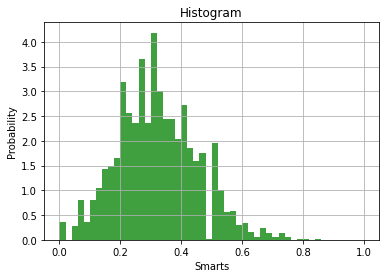

In [13]:

tokens = []
poss = []
positions = []
total_num = 0
dict_hard = {}
for label, content in data.iterrows():
    uid = content['id']
    T =content['T']
    easy_flag = content['easy']
    # print(type(easy_flag))
    # break
    if uid in dict_hard:
        if easy_flag==False:
            dict_hard[uid][0] += 1
    else:
        dict_hard[uid] = [0, T]
        if easy_flag == False:
            dict_hard[uid][0] += 1
docs = list(dict_hard.values())
ratio = [ d[0]/(d[1]-1) for d in docs if d[1]>1]
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# the histogram of the data
n, bins, patches = plt.hist(ratio, 50, density=True, facecolor='g', alpha=0.75,range=(0.,1.))


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()




